Epoch 0, Loss: 19.462975282535435
Epoch 1000, Loss: 4.572361218897286
Epoch 2000, Loss: 3.6434639737230055
Epoch 3000, Loss: 4.624068237369598
Epoch 4000, Loss: 1.867969538957162
Epoch 5000, Loss: 1.0460301760818735
Epoch 6000, Loss: 0.9675809378937068
Epoch 7000, Loss: 1.851688394780321
Epoch 8000, Loss: 1.4749208996416079
Epoch 9000, Loss: 1.4921120988400614
Epoch 10000, Loss: 1.476886863664459
Epoch 11000, Loss: 1.4677749600390255
Epoch 12000, Loss: 1.4654840677955467
Epoch 13000, Loss: 1.4615042983260849
Epoch 14000, Loss: 1.4575304025056228
Epoch 15000, Loss: 1.4537732823738283
Epoch 16000, Loss: 1.4502467719188559
Epoch 17000, Loss: 1.4469381755802084
Epoch 18000, Loss: 1.443828595135933
Epoch 19000, Loss: 1.4408982266063832
Epoch 20000, Loss: 1.4381281111546602
Epoch 21000, Loss: 1.435500692233274
Epoch 22000, Loss: 1.4329999246905802
Epoch 23000, Loss: 1.4306112112536473
Epoch 24000, Loss: 1.4283212774818752
Epoch 25000, Loss: 1.426118033009206
Epoch 26000, Loss: 1.423990441089

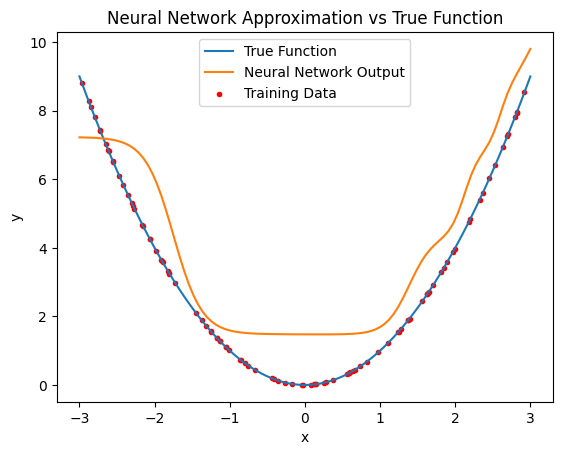

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def true_function(x):
    """
    The function we want to approximate using a neural network. 
    """
    return x**2


np.random.seed(42)
X_train = np.random.uniform(low=-3, high=3, size=(100, 1))
y_train = true_function(X_train)


"""
Neural Network with 1 hidden layer and 10 hidden units.

"""
input_size = 1
hidden_size = 10
output_size = 1
learning_rate = 0.01
epochs = 65000

    """
    Initialize weights and biases.

    """
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_input_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_hidden_output = np.zeros((1, output_size))

    """
    Train the neural network and update weights and biases. At last epoch, print the loss.
    """
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_input_hidden
    hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))
    predicted_output = np.dot(hidden_layer_output, weights_hidden_output) + bias_hidden_output

    loss = np.mean((predicted_output - y_train)**2)

    # Backward pass 
    output_error = predicted_output - y_train
    hidden_layer_error = np.dot(output_error, weights_hidden_output.T) * hidden_layer_output * (1 - hidden_layer_output)

    # Update weights and biases
    weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, output_error)
    bias_hidden_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
    weights_input_hidden -= learning_rate * np.dot(X_train.T, hidden_layer_error)
    bias_input_hidden -= learning_rate * np.sum(hidden_layer_error, axis=0, keepdims=True)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Test 
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
hidden_layer_input = np.dot(X_test, weights_input_hidden) + bias_input_hidden
hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))
predicted_output = np.dot(hidden_layer_output, weights_hidden_output) + bias_hidden_output

# Plot 
plt.plot(X_test, true_function(X_test), label='True Function')
plt.plot(X_test, predicted_output, label='Neural Network Output')
plt.scatter(X_train, y_train, color='red', marker='.', label='Training Data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Approximation vs True Function')
plt.show()



